<a href="https://colab.research.google.com/github/nicolasC777/Molecular-Dynamics-Simulation/blob/main/Python_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#Create particle class w/ position and radius
class Particle():
    def __init__(self, radius, x, y):
        self.radius = radius
        self.x = x
        self.y = y


In [ ]:
#Calculates distance b/w two points
def calcDistance(p, q):
    return (math.sqrt((p.x - q.x)**2 + (p.y - q.y)**2))

In [ ]:
#Initializes diamter and epsilon of Helium atom
diameter = 2.65
epsilon =  0.00057
#Lennard-Jones Pot. Energy Equation, where r is distane b/w centers of two points
def U(r): return 4 * epsilon * ((diameter / r)**12 - (diameter / r)**6)

In [ ]:
#Initializes size of chamber and Boltzmann's constant
length = 100
width = 100
kB = 1.38e-23 

In [ ]:
import random as rd
#Creates a list of 50 particle objects w/ random position 
atoms = [Particle(diameter/2, rd.uniform(0, length), rd.uniform(0,width)) for i in range(50)]
#Creates a dataframe of x and y coords for each particle object
x_coords, y_coords = [atoms[i].x for i in range(len(atoms))], [atoms[i].y for i in range(len(atoms))]
d = {'x': x_coords, 'y': y_coords}
df = pd.DataFrame(data=d)
df

,x,y
0,34.764407,0.342384
1,45.143718,99.613644
2,0.526198,0.130989
3,85.770794,26.022527
4,87.310361,6.781136
5,88.933301,2.697687
6,12.597817,65.721067
7,46.204014,92.837950
8,23.620922,42.359547
9,30.711224,88.267783


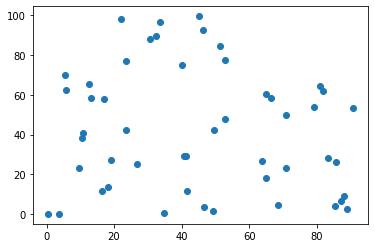

In [ ]:
#Plots the points from dataframe
fig = plt.figure()
ax1 = fig.add_subplot(111)        
ax1.scatter(df['x'],df['y'])

In [ ]:
import numpy as np
#Creates a timestep function to iterate changes for given num of seconds
def timestep(sec, U):
    #Creates list for starting avg energies, time, and temp
    avg_energies = [0]
    temp = [0]
    counter = [0]
    #goes through each second
    for s in range(sec):
      #update movement for each particle within bounds
        energies = []
        for i in range(0,len(atoms)):
            #calculates random euclidean movement
            mvmtX ,mvmtY = rd.uniform(-5,5), rd.uniform(-5,5)
            atoms[i].x = atoms[i].x + mvmtX #random float mvmt b/w -5 and 5
            atoms[i].y = atoms[i].y + mvmtY 
            distances = []
            #searches for closest distance with other atoms
            for j in range(0, len(atoms)):
                if i != j:
                    distances.append(calcDistance(atoms[i], atoms[j]))
            close = min(distances)
            #appends Lennard-Jones result to energy
            energies.append(U(close))
            if atoms[i].x > width:
                atoms[i].x = atoms[i].x - (rd.uniform(2,5))
            if atoms[i].x < 0:
                atoms[i].x = atoms[i].x + (rd.uniform(2,5))
            if atoms[i].y > length:
                atoms[i].y = atoms[i].y - (rd.uniform(2,5))
            if atoms[i].y < 0:
                atoms[i].y = atoms[i].y + (rd.uniform(2,5))

        #removes duplicates from list and appends avg to list
        energies = list(dict.fromkeys(energies))
        avg_energies.append(np.average(energies))
        #appends temp from ratio of avg energy and kB
        temp.append(avg_energies[s+1]/kB)

        #updates coords, stores in dataframe, plots the points
        x_coords, y_coords = [atoms[i].x for i in range(len(atoms))], [atoms[i].y for i in range(len(atoms))]
        d = {'x': x_coords, 'y': y_coords}
        df = pd.DataFrame(data=d)     
        fig = plt.figure()
        ax1 = fig.add_subplot(111)
        ax1.scatter(df['x'],df['y'])
        counter.append(counter[s]+1)
    
    #plots PE over time
    plt.figure()
    plt.xlabel("Time (sec)")
    plt.ylabel("Average Potential Energy (J)")
    plt.title("Average Potential Energy Over Time")
    plt.plot(counter, avg_energies)
    
    #plots temp over time
    plt.figure()
    plt.xlabel("Time (sec)")
    plt.ylabel("Average Temperature (K)")
    plt.title("Average Temperature Over Time")
    plt.plot(counter, temp)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)

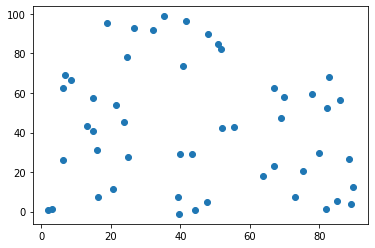

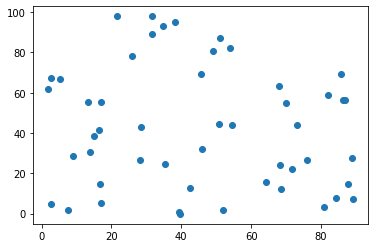

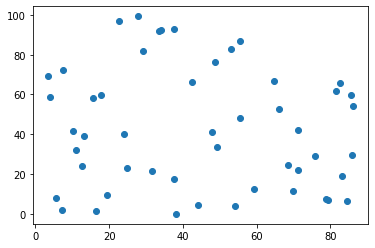

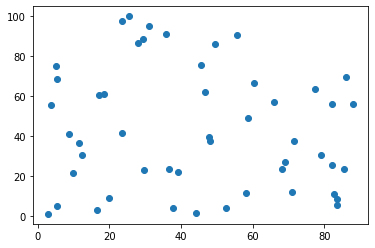

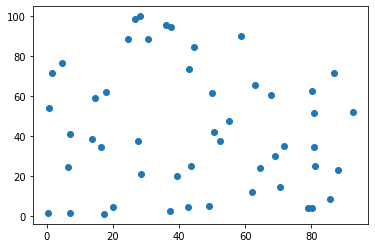

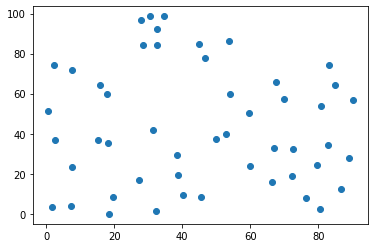

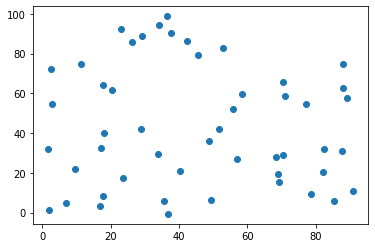

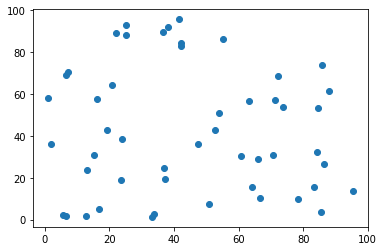

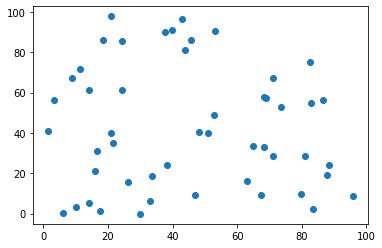

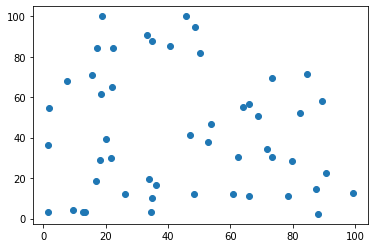

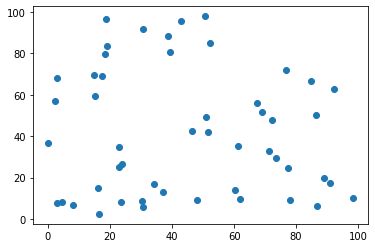

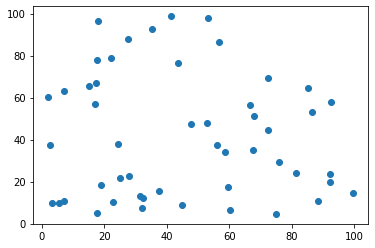

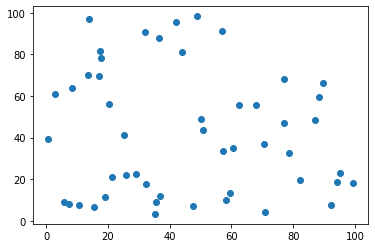

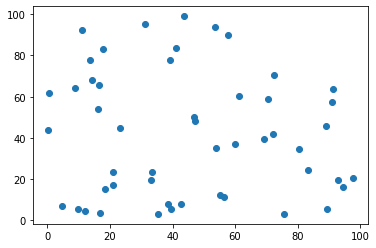

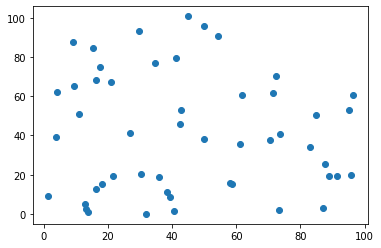

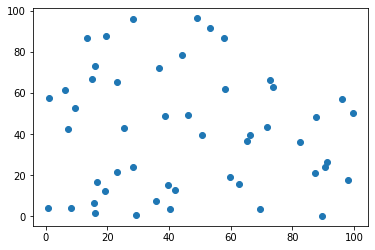

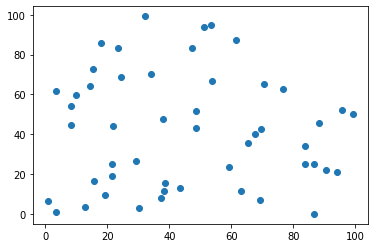

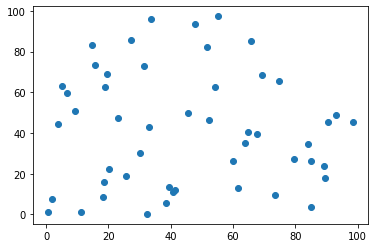

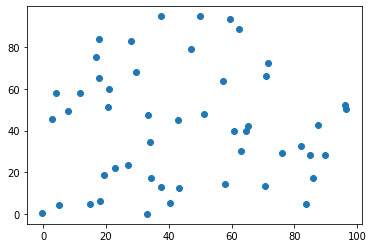

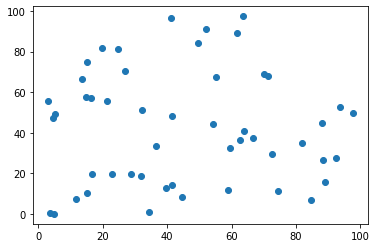

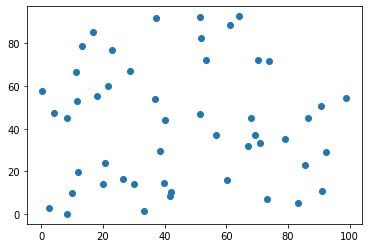

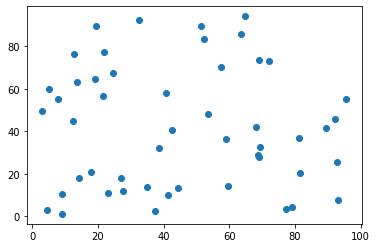

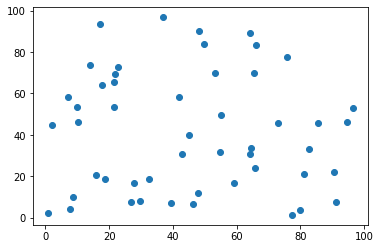

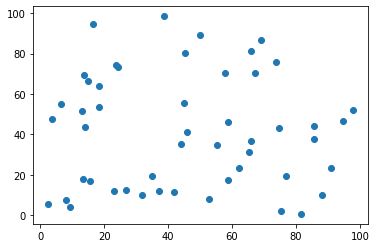

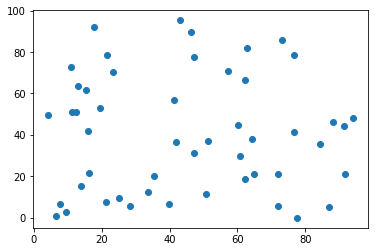

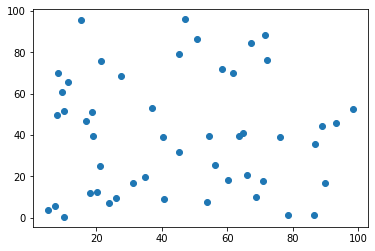

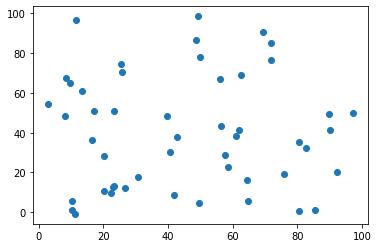

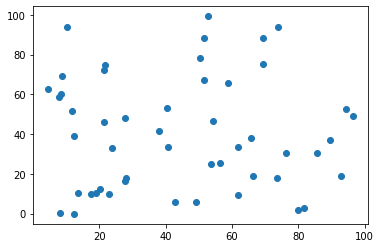

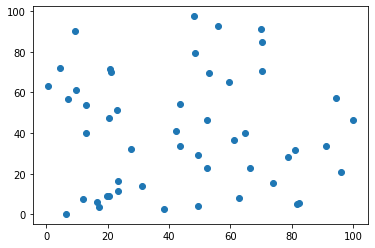

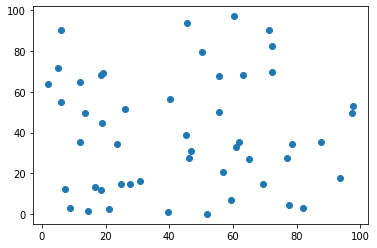

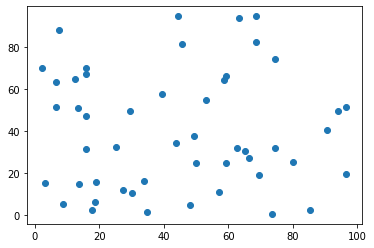

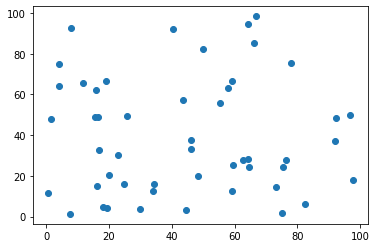

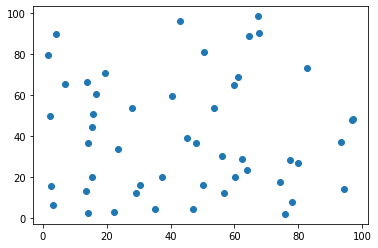

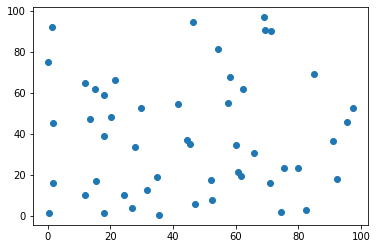

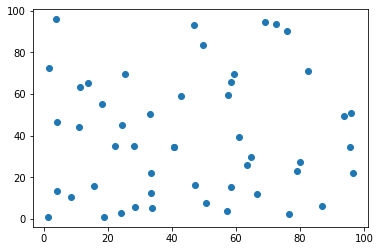

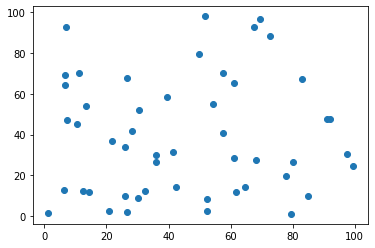

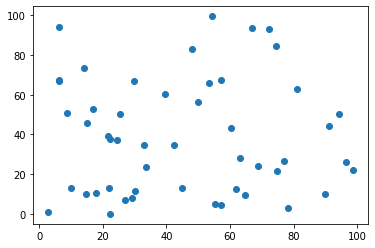

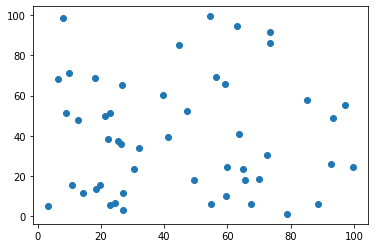

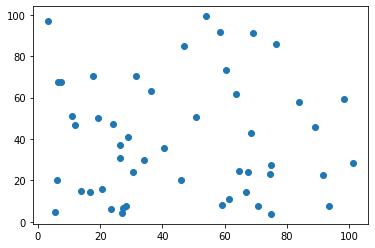

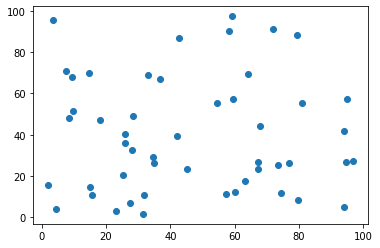

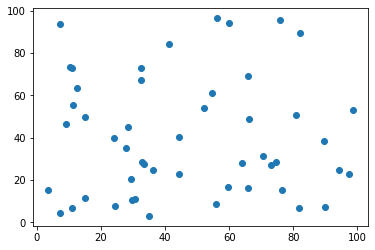

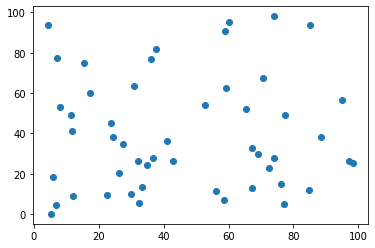

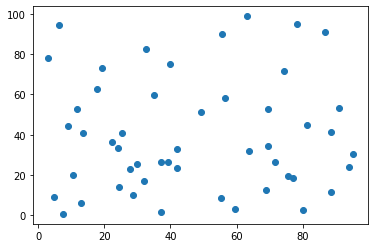

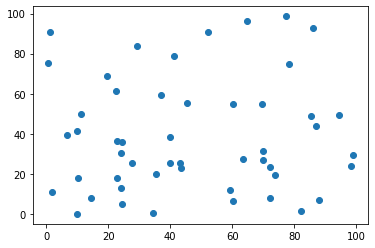

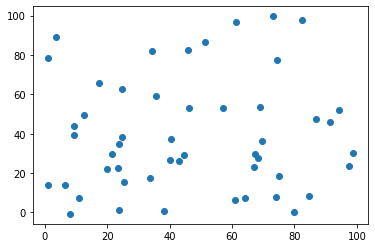

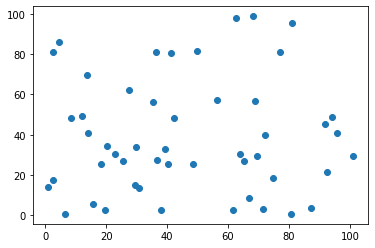

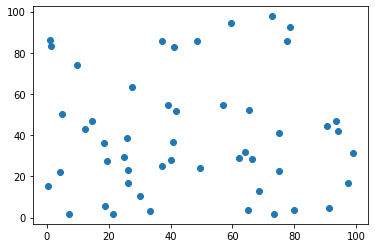

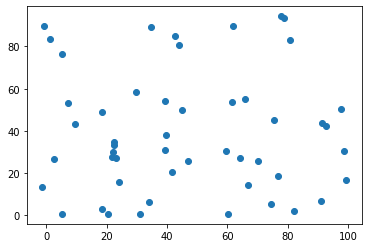

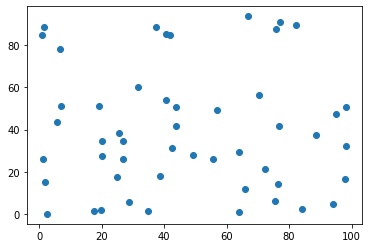

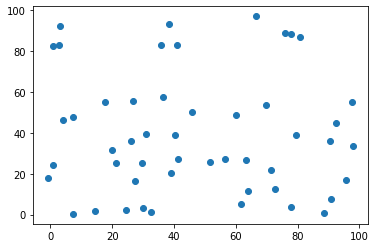

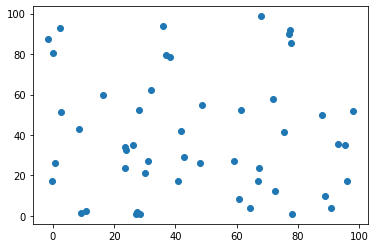

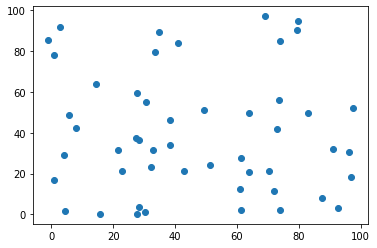

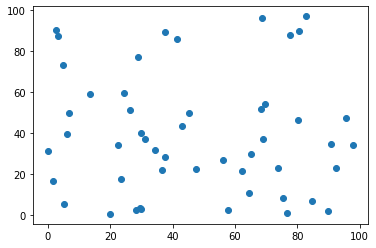

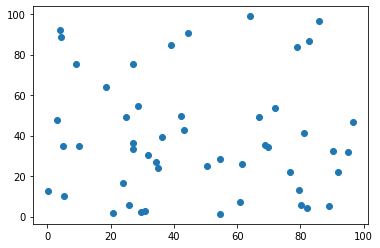

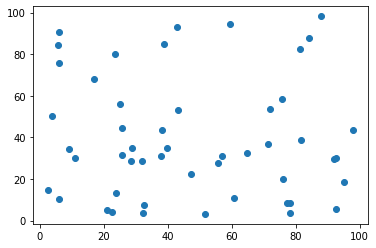

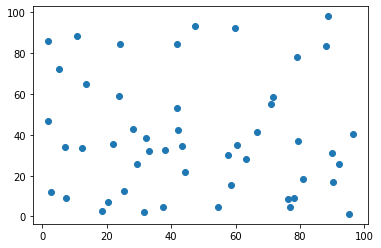

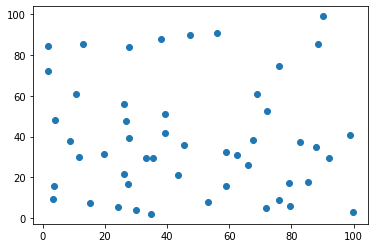

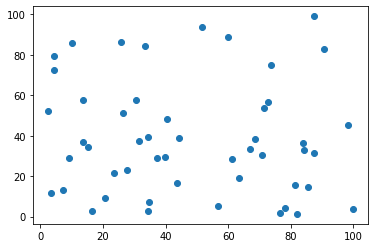

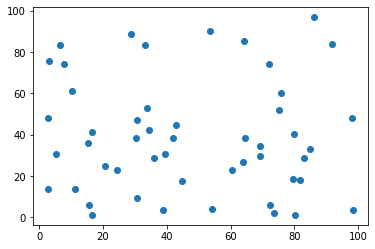

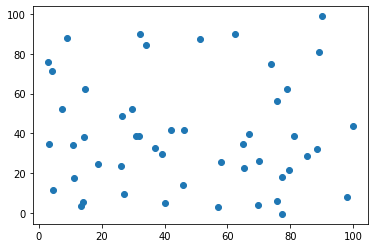

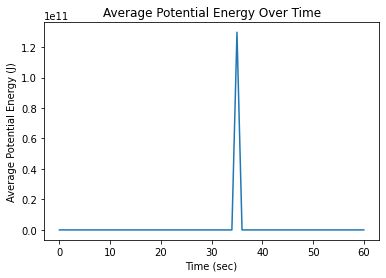

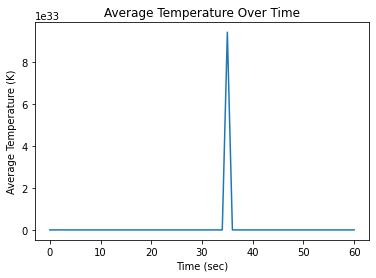

In [ ]:
#iterate for 60 seconds
timestep(60, U)